In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


In [58]:
clean_data = pd.read_excel('csdm.xlsx')
type1 = pd.read_excel('../Datasets/Shanghai_T1DM_Summary.xlsx')
type2 = pd.read_excel('../Datasets/Shanghai_T2DM_Summary.xlsx')

In [59]:
# Load the dataset
cd1 = clean_data

In [42]:
cd1 

,Patient Number,"Gender (Female=1, Male=2)",Age (years),Height (m),Weight (kg),BMI (kg/m2),Smoking History (pack year),Alcohol Drinking History (drinker/non-drinker),Type of Diabetes,Acute Diabetic Complications,...,Triglyceride (mmol/L),High-Density Lipoprotein Cholesterol (mmol/L),Low-Density Lipoprotein Cholesterol (mmol/L),Creatinine (umol/L),Estimated Glomerular Filtration Rate (ml/min/1.73m2),Uric Acid (mmol/L),Blood Urea Nitrogen (mmol/L),Hypoglycemia (yes/no),Merge 2-hour Postprandial insulin (pmol/L),Merge DoD (years)
0,1001_0_20210730,1.0,66.0,1.50,60.0,26.666667,0.0,non-drinker,T1DM,none,...,1.02,0.86,2.01,37.30,160.00,188.86,6.47,no,390.36,10.000000
1,1002_0_20210504,2.0,68.0,1.70,63.0,21.799308,50.0,drinker,T1DM,diabetic ketoacidosis,...,2.20,0.93,3.28,66.80,109.00,342.57,6.05,yes,754.71,26.000000
2,1002_1_20210521,2.0,68.0,1.70,67.0,23.183391,50.0,drinker,T1DM,diabetic ketoacidosis,...,2.20,0.93,3.28,69.40,104.00,322.18,3.06,yes,754.71,26.000000
3,1002_2_20210909,2.0,68.0,1.70,65.0,22.491349,50.0,drinker,T1DM,none,...,1.82,0.84,1.83,63.70,115.00,342.34,6.21,yes,74.39,26.000000
4,1003_0_20210831,2.0,37.0,1.90,60.0,16.620499,0.0,non-drinker,T1DM,diabetic ketoacidosis,...,1.14,1.08,3.95,49.60,174.00,93.39,1.85,yes,390.36,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2096_0_20201116,1.0,60.0,1.57,65.0,26.370238,0.0,non-drinker,T2DM,none,...,0.93,2.06,3.65,63.06,118.95,321.66,5.90,no,307.47,0.100000
122,2097_0_20201116,1.0,71.0,1.70,66.8,23.114187,0.0,non-drinker,T2DM,none,...,2.21,1.48,3.89,72.00,73.00,369.00,5.90,no,307.47,20.000000
123,2098_0_20201106,1.0,64.0,1.60,67.0,26.171875,0.0,non-drinker,T2DM,none,...,1.69,1.17,3.07,63.06,118.95,321.66,5.90,no,307.47,0.100000
124,2099_0_20201116,1.0,44.0,1.52,67.0,28.999307,0.0,non-drinker,T2DM,none,...,1.69,1.17,3.07,63.06,118.95,321.66,5.90,no,307.47,0.100000


In [6]:
# Displaying the columns of cd1
print("Columns of cd1:")
print(cd1.columns)



Columns of cd1:
Index(['Patient Number', 'Gender (Female=1, Male=2)', 'Age (years)',
       'Height (m)', 'Weight (kg)', 'BMI (kg/m2)',
       'Smoking History (pack year)',
       'Alcohol Drinking History (drinker/non-drinker)', 'Type of Diabetes',
       'Acute Diabetic Complications', 'Diabetic Macrovascular  Complications',
       'Diabetic Microvascular Complications', 'Comorbidities',
       'Hypoglycemic Agents', 'Other Agents', 'Fasting Plasma Glucose (mg/dl)',
       '2-hour Postprandial Plasma Glucose (mg/dl)',
       'Fasting C-peptide (nmol/L)', '2-hour Postprandial C-peptide (nmol/L)',
       'Fasting Insulin (pmol/L)', 'HbA1c (mmol/mol)', 'Glycated Albumin (%)',
       'Total Cholesterol (mmol/L)', 'Triglyceride (mmol/L)',
       'High-Density Lipoprotein Cholesterol (mmol/L)',
       'Low-Density Lipoprotein Cholesterol (mmol/L)', 'Creatinine (umol/L)',
       'Estimated Glomerular Filtration Rate  (ml/min/1.73m2) ',
       'Uric Acid (mmol/L)', 'Blood Urea Nitrogen (mm

In [7]:
print(cd1.dtypes)

Patient Number                                             object
Gender (Female=1, Male=2)                                 float64
Age (years)                                               float64
Height (m)                                                float64
Weight (kg)                                               float64
BMI (kg/m2)                                               float64
Smoking History (pack year)                               float64
Alcohol Drinking History (drinker/non-drinker)             object
Type of Diabetes                                           object
Acute Diabetic Complications                               object
Diabetic Macrovascular  Complications                      object
Diabetic Microvascular Complications                       object
Comorbidities                                              object
Hypoglycemic Agents                                        object
Other Agents                                               object
Fasting Pl

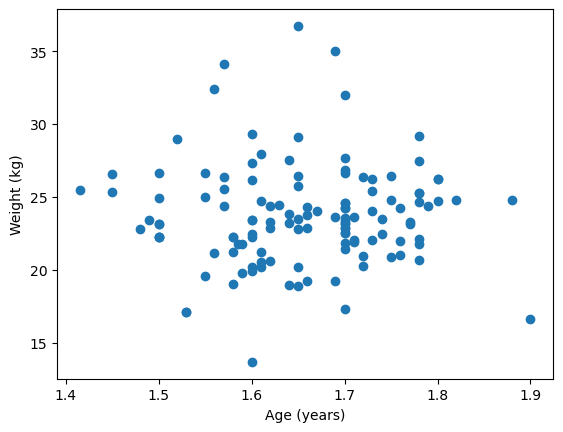

In [63]:
#Looking for coorelations between different columns. In this example its a comparisson of age factor vs weight.

plt.scatter(cd1.iloc[:,3],cd1.iloc[:,5])
plt.xlabel('Age (years)')
plt.ylabel('Weight (kg)')
plt.show()

In [9]:
# Handling outliers
# Use statistical methods to identify and handle outliers in the data

# Identify and handle outliers using statistical methods (e.g., Z-score, IQR)

# Feature engineering
# Create new features from existing data if needed

# Create a new feature based on existing data
# Example: Create a new feature by combining existing columns
#df3['new_feature'] = df3['column1'] * df3['column2']


In [10]:
# After doing some research on diabetes to help understand the different variables at play, here are some suggestions on what new data we could make.

In [64]:
# Body Mass Index (BMI) Category: A new feature based on BMI ranges.

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

cd1['BMI Category'] = cd1['BMI (kg/m2)'].apply(categorize_bmi)


In [74]:
cd1['BMI Category'].unique()

array(['Overweight', 'Normal Weight', 'Underweight', 'Obese'],
      dtype=object)

In [75]:
#cd1['BMI Category'] = cd1['BMI Category'].apply(['Underweight', 'Normal Weight', 'Overweight', 'Obese'])

In [65]:
#Total Daily Insulin Dose: Utilizing data on both fasting and postprandial insulin levels, we can calculate the total daily insulin dose:
#First convert to float or int, then run calculation.

cd1['Fasting Insulin (pmol/L)'] = pd.to_numeric(cd1['Fasting Insulin (pmol/L)'], errors='coerce')
cd1['Merge 2-hour Postprandial insulin (pmol/L)'] = pd.to_numeric(cd1['Merge 2-hour Postprandial insulin (pmol/L)'], errors='coerce')
cd1['Total Daily Insulin Dose (pmol/L)'] = (cd1['Fasting Insulin (pmol/L)'] + cd1['Merge 2-hour Postprandial insulin (pmol/L)']) * 24

In [66]:
# Separating data for male and female patients
male_data = cd1[cd1['Gender (Female=1, Male=2)'] == 2]
female_data = cd1[cd1['Gender (Female=1, Male=2)'] == 1]

In [67]:
# Calculating mean BMI for male and female patients to show functional use of gendered data.
mean_bmi_male = male_data['BMI (kg/m2)'].mean()
mean_bmi_female = female_data['BMI (kg/m2)'].mean()

print("Mean BMI for male patients:", mean_bmi_male)
print("Mean BMI for female patients:", mean_bmi_female)

Mean BMI for male patients: 23.74977607862903
Mean BMI for female patients: 23.688884664533493


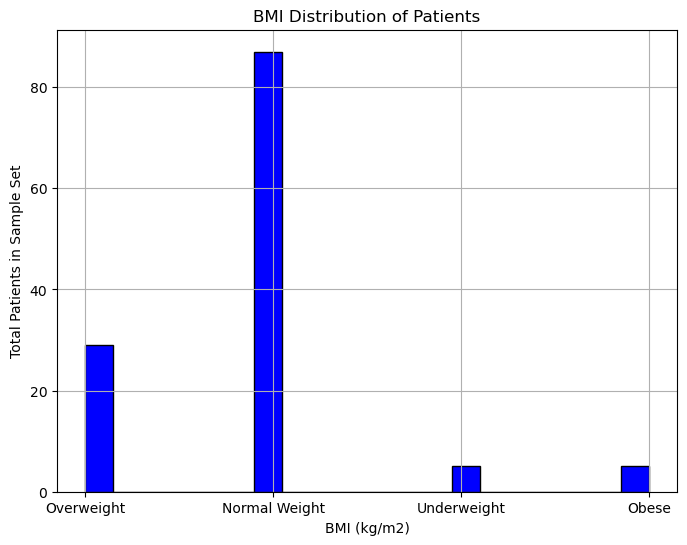

In [76]:
# Plotting BMI distribution

plt.figure(figsize=(8, 6))
plt.hist(cd1['BMI Category'], bins=20, color='b', edgecolor='k')
plt.title('BMI Distribution of Patients')
plt.xlabel('BMI (kg/m2)')
plt.ylabel('Total Patients in Sample Set')
plt.grid(True)
plt.savefig('bmidist.png')
plt.show()

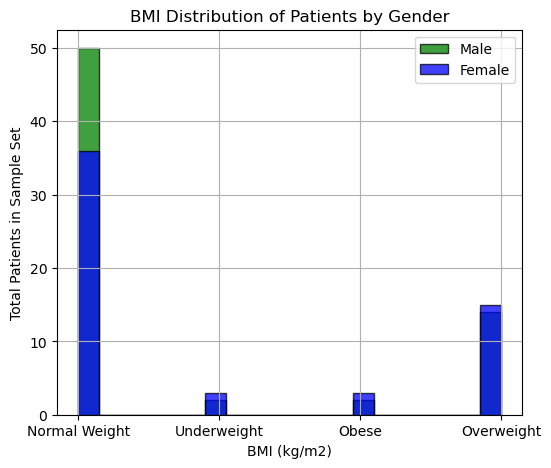

In [78]:
# Plotting BMI distribution for male and female patients
plt.figure(figsize=(6, 5))
plt.hist(male_data['BMI Category'], bins=20, color='green', alpha=.75, label='Male', edgecolor='black')
plt.hist(female_data['BMI Category'], bins=20, color='blue', alpha=.75, label='Female', edgecolor='black')
plt.title('BMI Distribution of Patients by Gender')
plt.xlabel('BMI (kg/m2)')
plt.ylabel('Total Patients in Sample Set')
plt.legend()
plt.grid(True)
plt.savefig('bmidistgender.png')
plt.show()

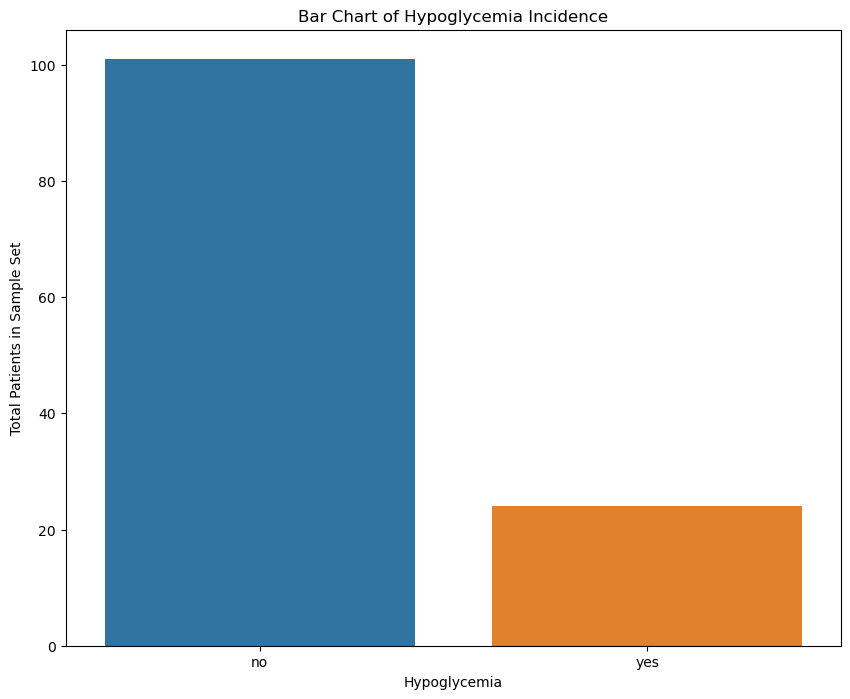

In [79]:
# Visualization 2: Bar Chart of Hypoglycemia Incidence
plt.figure(figsize=(10, 8))
sns.countplot(x='Hypoglycemia (yes/no)', data=cd1)
plt.title('Bar Chart of Hypoglycemia Incidence')
plt.ylabel('Total Patients in Sample Set')
plt.xlabel('Hypoglycemia')
plt.savefig('hypoglycemia.png')
plt.show()


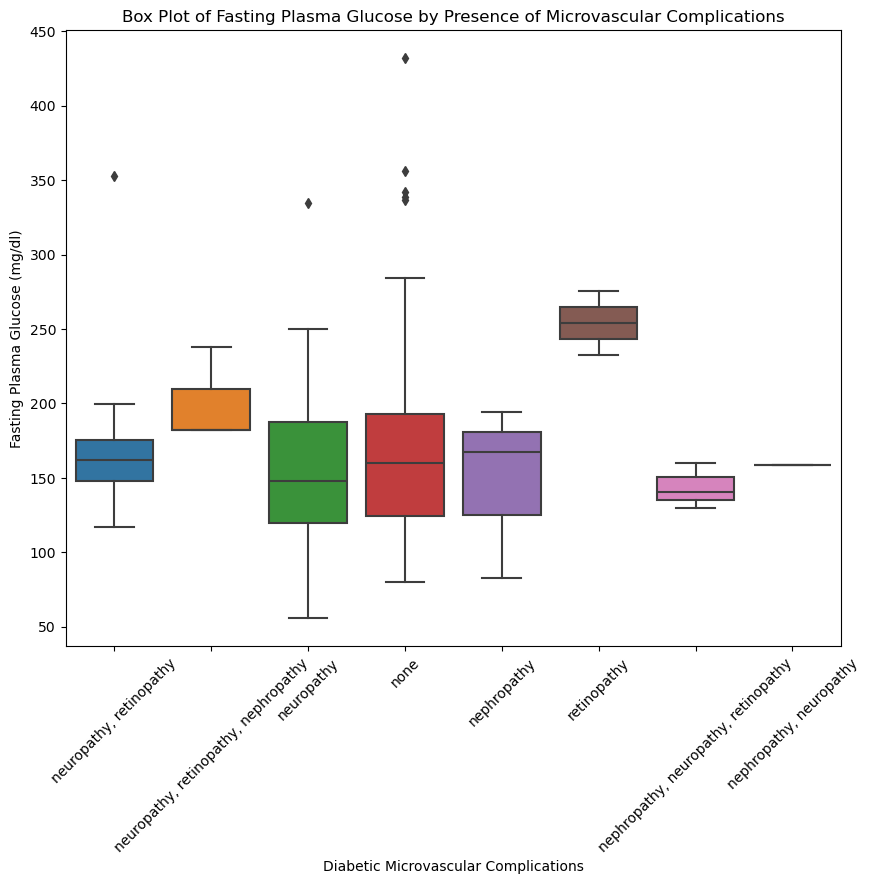

In [17]:
# Visualization 3: Box Plot of Fasting Plasma Glucose by Presence of Microvascular Complications

plt.figure(figsize=(10, 8))
sns.boxplot(x='Diabetic Microvascular Complications', y='Fasting Plasma Glucose (mg/dl)', data=cd1)
plt.title('Box Plot of Fasting Plasma Glucose by Presence of Microvascular Complications')
plt.xticks(rotation=45)
plt.savefig('boxplotfastingplasma.png')
plt.show()


c:\Users\revcr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\revcr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


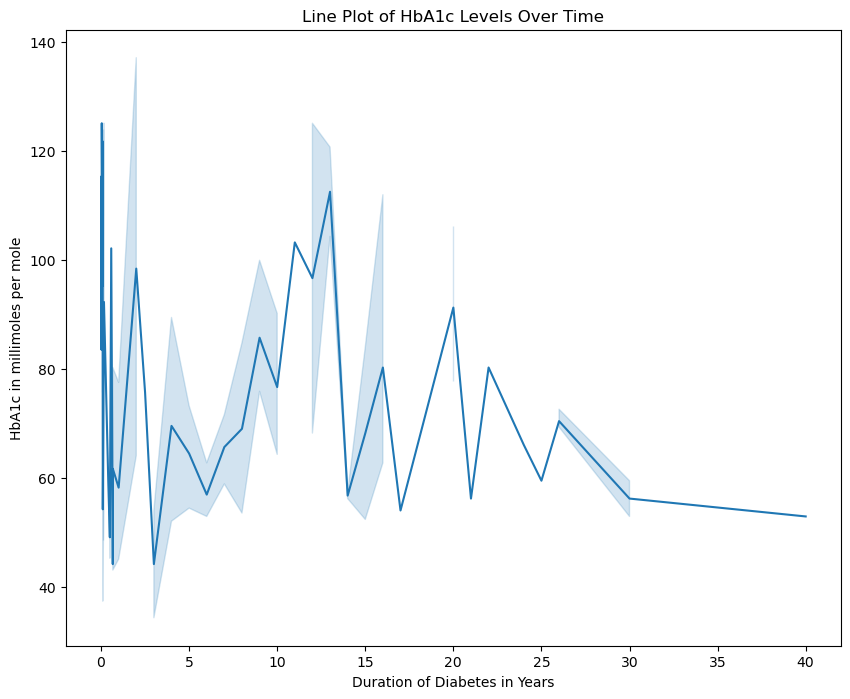

In [18]:
# Visualization 4: Line Plot of HbA1c Levels Over Time
plt.figure(figsize=(10, 8))
sns.lineplot(x='Merge DoD (years)', y='HbA1c (mmol/mol)', data=cd1)
plt.title('Line Plot of HbA1c Levels Over Time')
plt.xlabel('Duration of Diabetes in Years')
plt.ylabel('HbA1c in millimoles per mole')
plt.savefig('lineplothba1c.png')
plt.show()



In [19]:
# how to get the labels under BMI
# Find unique labels under the 'Category' column
unique_labels = cd1['Diabetic Macrovascular  Complications'].unique()

print("Unique labels under the 'Diabetic Macrovascular  Complications' column:")
print(unique_labels)

cd1['Diabetic Macrovascular  Complications'].value_counts()

Unique labels under the 'Diabetic Macrovascular  Complications' column:
['peripheral arterial disease, cerebrovascular disease'
 'coronary heart disease' 'none' 'peripheral arterial disease'
 'peripheral arterial disease, coronary heart disease'
 'coronary heart disease, peripheral arterial disease'
 'cerebrovascular disease' 'coronary heart disease  ' nan]


Diabetic Macrovascular  Complications
none                                                    78
peripheral arterial disease                             22
coronary heart disease                                  10
peripheral arterial disease, coronary heart disease      5
peripheral arterial disease, cerebrovascular disease     4
cerebrovascular disease                                  4
coronary heart disease, peripheral arterial disease      1
coronary heart disease                                   1
Name: count, dtype: int64

In [20]:
# Create a sample DataFrame with the given unique labels
# data = {'Diabetic Macrovascular Complications': ['peripheral arterial disease, cerebrovascular disease', 
#                                                  'coronary heart disease', 'none', 'peripheral arterial disease', 
#                                                  'peripheral arterial disease, coronary heart disease', 
#                                                  'coronary heart disease, peripheral arterial disease', 
#                                                  'cerebrovascular disease', 'coronary heart disease  ', 'nan']}
# df = pd.DataFrame(data)

# Define the mapping of old labels to new labels
replacement_mapping = {'peripheral arterial disease, cerebrovascular disease': 'Peri-Arterial & Cerebrovascular',
    'coronary heart disease': 'Coronary Heart Disease',
    'none': 'Not Present in Patient',
    'peripheral arterial disease': 'Peripheral Arterial Disease',
    'peripheral arterial disease, coronary heart disease': 'PAD & Coronary Heart Disease',
    'coronary heart disease, peripheral arterial disease': 'Coronary Heart Disease & PAD',
    'cerebrovascular disease': 'Cerebrovascular Disease',
    'coronary heart disease  ': 'Coronary Heart Disease',
    'nan': ''
}

# Replace the values in the DataFrame column using the mapping
cd1['Diabetic Macrovascular Complications'] = cd1['Diabetic Macrovascular  Complications'].replace(replacement_mapping)


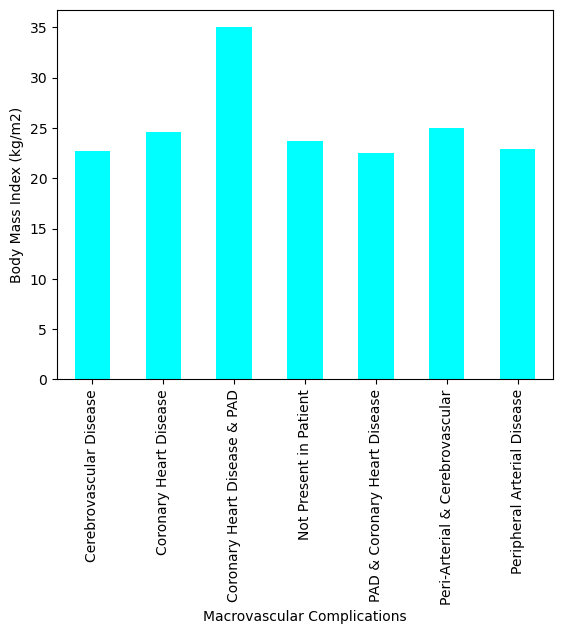

In [26]:
#Correlation Between BMI and Diabetic Macrovascular Complications: 
#Explore the correlation between BMI and the occurrence of macrovascular complications using a bar graph.
cd1.groupby('Diabetic Macrovascular Complications')['BMI (kg/m2)'].mean().plot(kind='bar', color='cyan')
plt.xlabel('Macrovascular Complications')
plt.ylabel('Body Mass Index (kg/m2)')
plt.savefig('bmidmc.png')

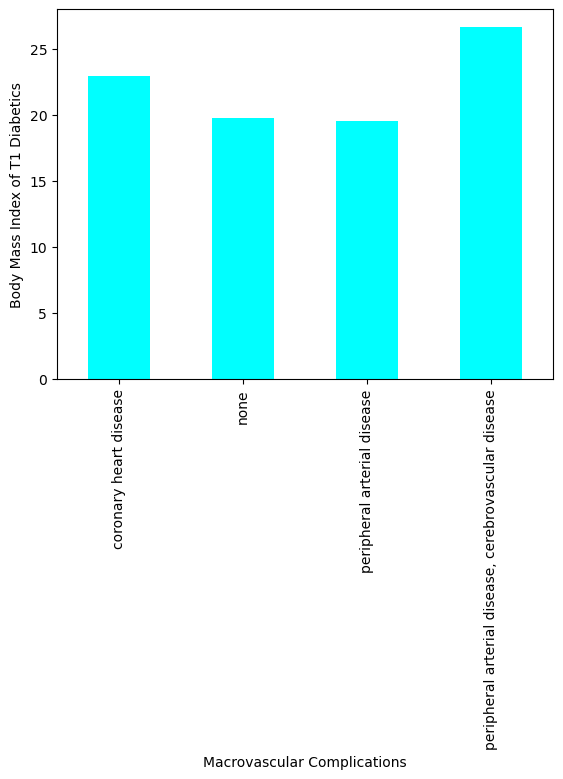

In [27]:
#Comparison based on Type1 Diabetes

type1.groupby('Diabetic Macrovascular  Complications')['BMI (kg/m2)'].mean().plot(kind='bar', color='cyan')
plt.xlabel('Macrovascular Complications')
plt.ylabel('Body Mass Index of T1 Diabetics')
plt.savefig('bmidmct1.png')

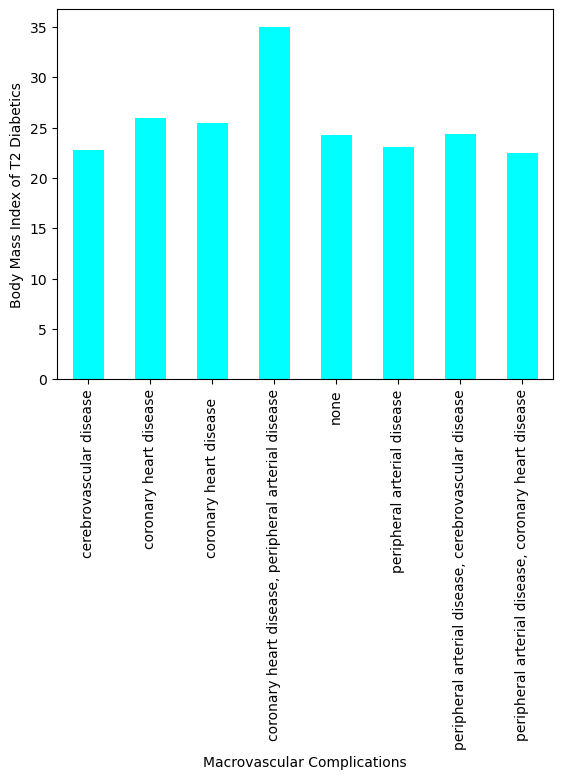

In [28]:
#Comparison based on Type2 Diabetes

type2.groupby('Diabetic Macrovascular  Complications')['BMI (kg/m2)'].mean().plot(kind='bar', color='cyan')
plt.xlabel('Macrovascular Complications')
plt.ylabel('Body Mass Index of T2 Diabetics')
plt.savefig('bmidmct2.png')

c:\Users\revcr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


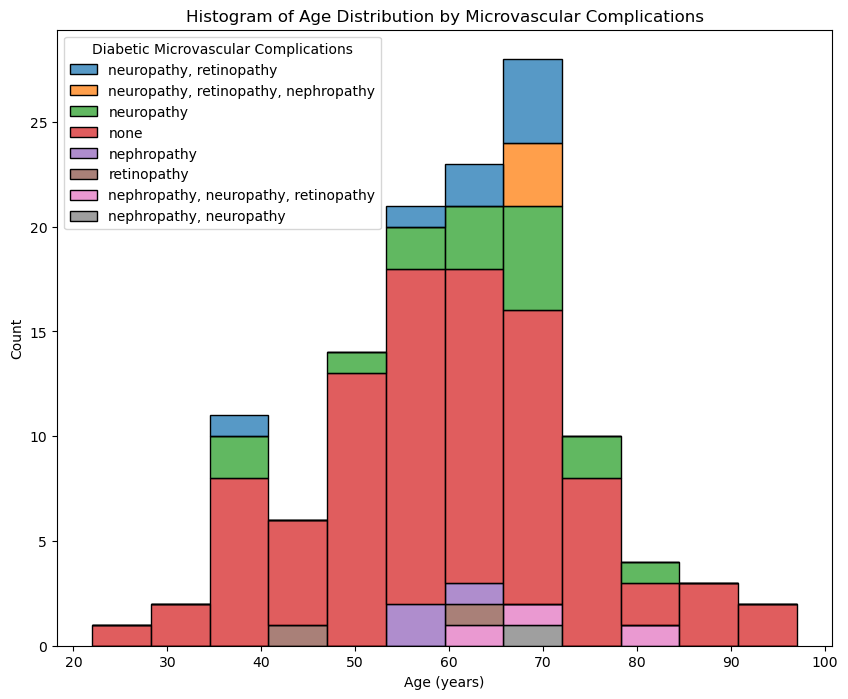

In [30]:
# Visualization 5: Histogram of Age Distribution by Microvascular Complications
plt.figure(figsize=(10, 8))
sns.histplot(data=cd1, x='Age (years)', hue='Diabetic Microvascular Complications', multiple='stack')
plt.title('Histogram of Age Distribution by Microvascular Complications')
plt.savefig('histogram.png')
plt.show()


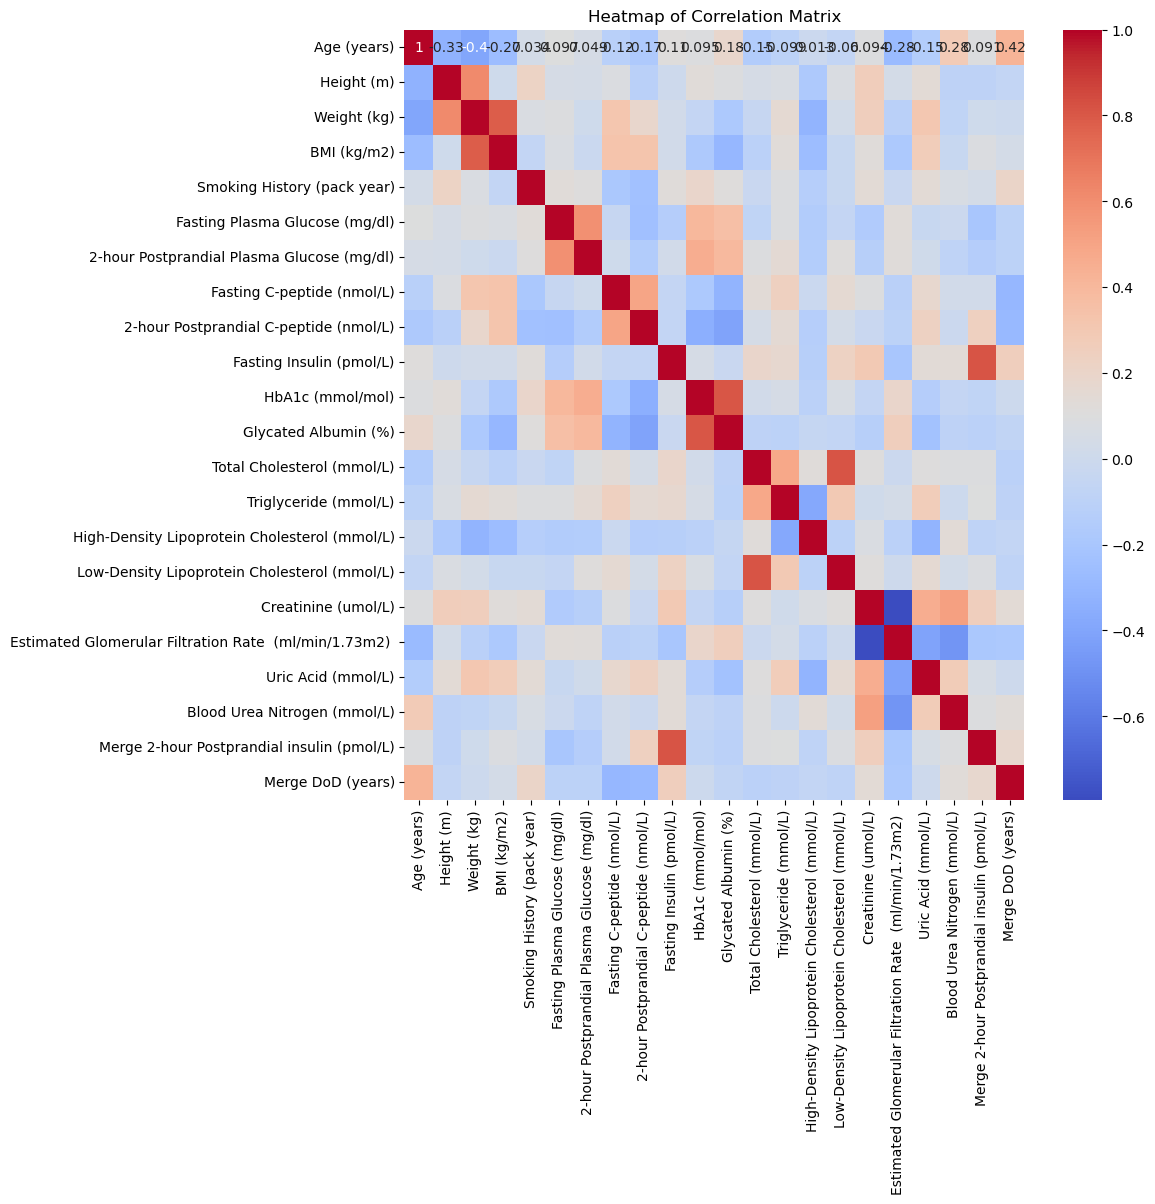

In [54]:
# Visualization 6: Heatmap of Correlation Matrix
# Drop non-numeric columns before calculating the correlation matrix
df_numeric = cd1.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.savefig('heatmap.png')
plt.show()


In [49]:
# Convert numeric values in 'Gender (Female=1, Male=2)' column to meaningful labels
cd1['Gender (Female=1, Male=2)'] = cd1['Gender (Female=1, Male=2)'].map({1: 'Female', 2: 'Male'})

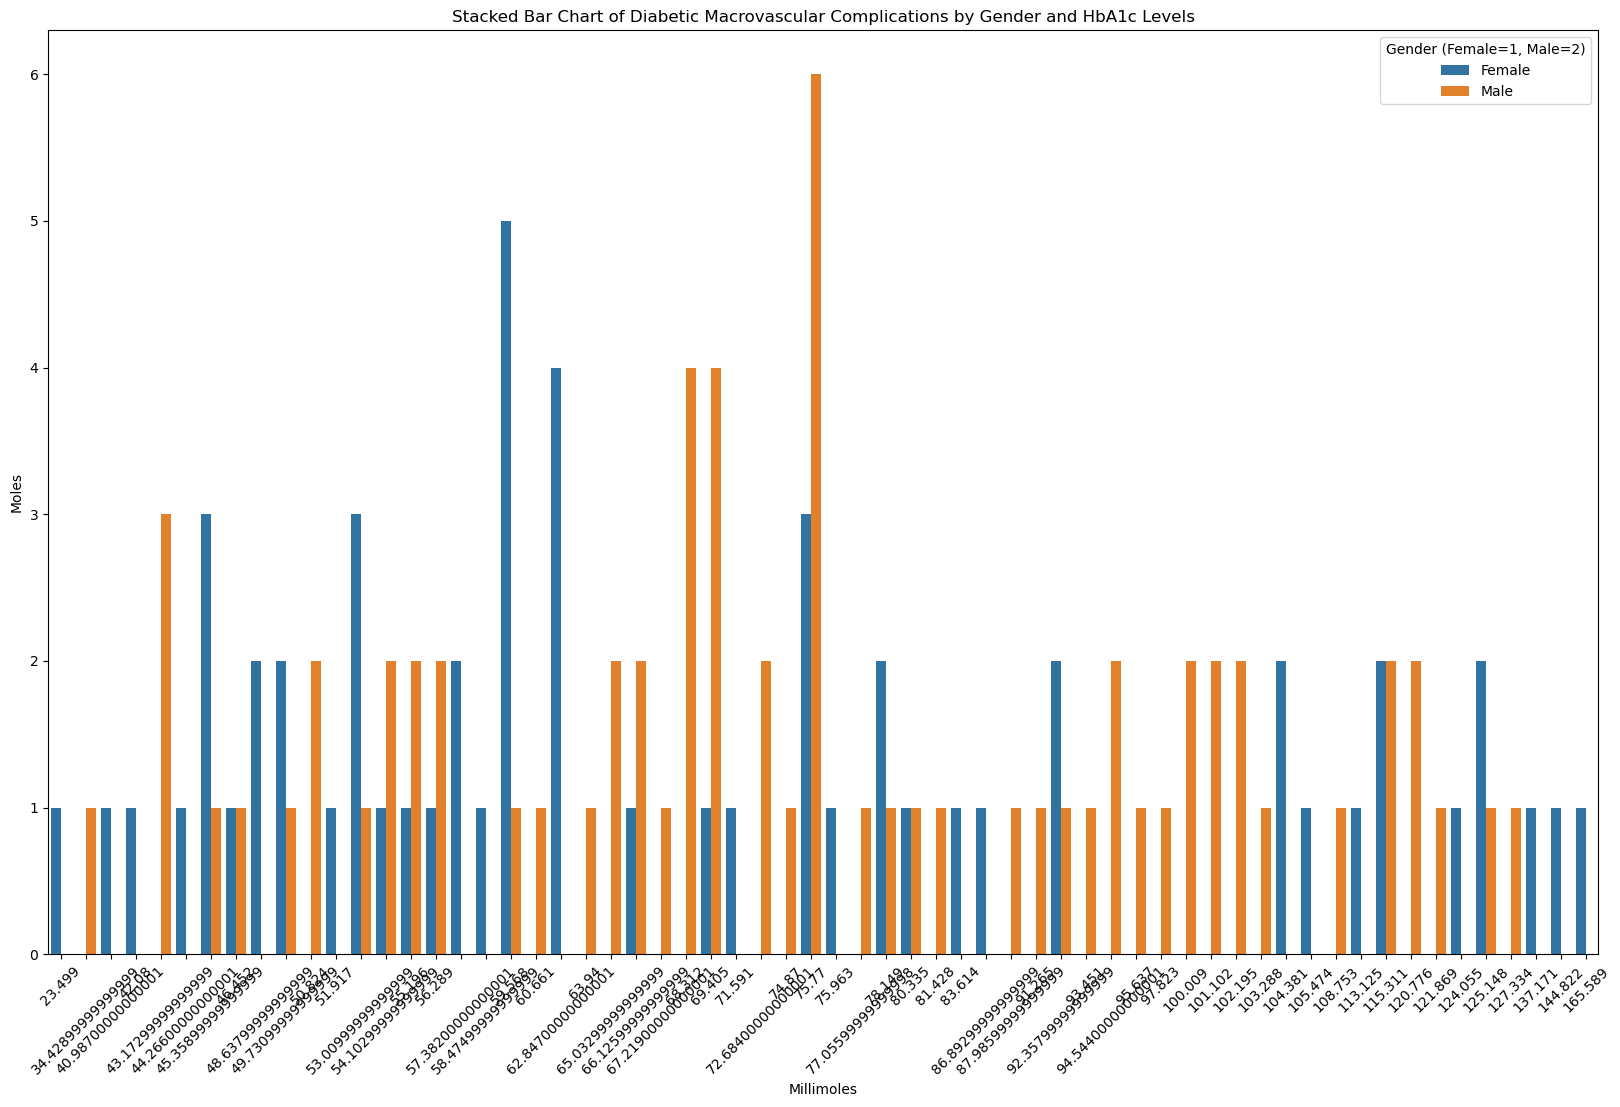

In [56]:
# Visualization 8: Stacked Bar Chart of Diabetic Macrovascular Complications by Gender and HbA1c Levels


plt.figure(figsize=(20, 12))
sns.countplot(x='HbA1c (mmol/mol)', hue='Gender (Female=1, Male=2)', data=cd1)
plt.title('Stacked Bar Chart of Diabetic Macrovascular Complications by Gender and HbA1c Levels')
plt.xlabel('Millimoles')
plt.ylabel('Moles')
plt.xticks(rotation=45)
plt.savefig('stackedbarchart.png')
plt.show()

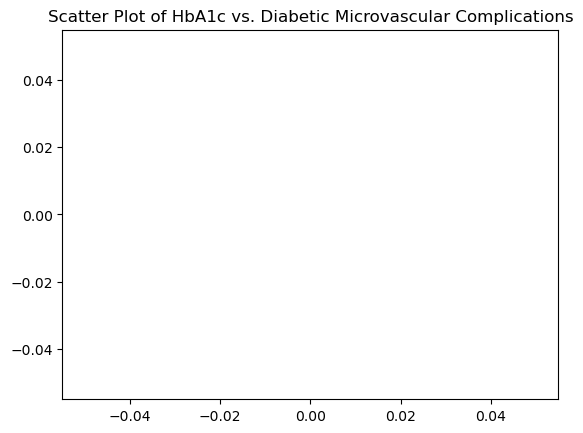

In [83]:
# Visualization 1: Scatter Plot of HbA1c vs. Diabetic Microvascular Complications
# Clean and convert 'HbA1c (mmol/mol)' column to numeric
cd1['HbA1c (mmol/mol)'] = pd.to_numeric(cd1['HbA1c (mmol/mol)'], errors='coerce')

cd1['Diabetic Microvascular Complications'] = pd.to_numeric(cd1['Diabetic Microvascular Complications'], errors='coerce')
sns.scatterplot(x='HbA1c (mmol/mol)', y='Diabetic Microvascular Complications', data=cd1)
plt.title('Scatter Plot of HbA1c vs. Diabetic Microvascular Complications')
plt.show()


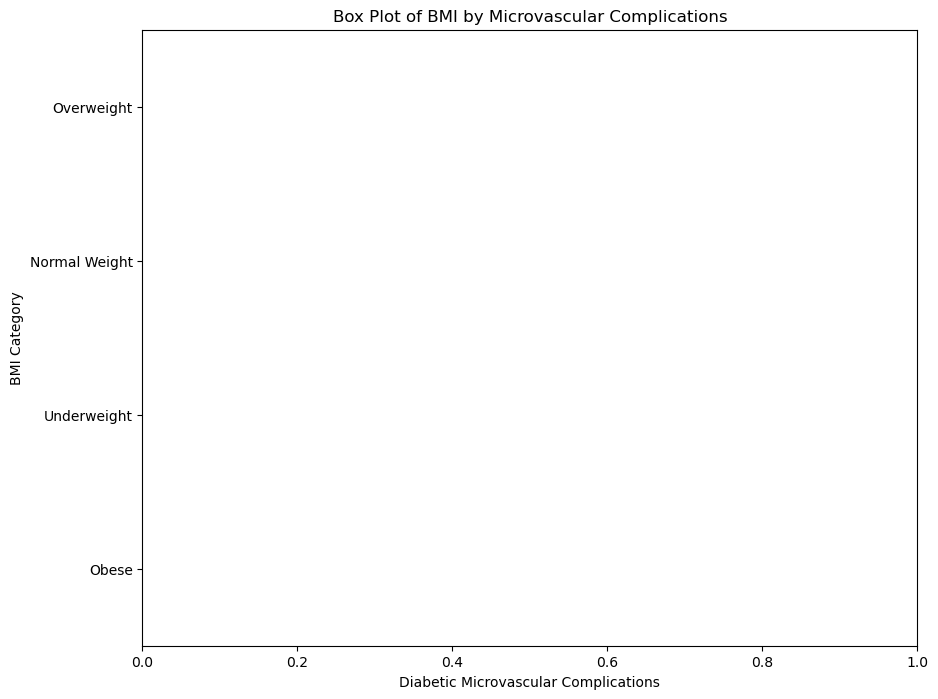

In [87]:
# Visualization 7: Box Plot of BMI by Microvascular Complications
plt.figure(figsize=(10, 8))
sns.boxplot(x='Diabetic Microvascular Complications', y='BMI Category', data=cd1)
plt.title('Box Plot of BMI by Microvascular Complications')
plt.show()

